In [68]:
import pandas as pd
import matplotlib.pyplot as matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix

### data preprocessing

In [12]:
data = pd.read_csv('OnlineRetail.csv', encoding = 'Unicode_escape')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


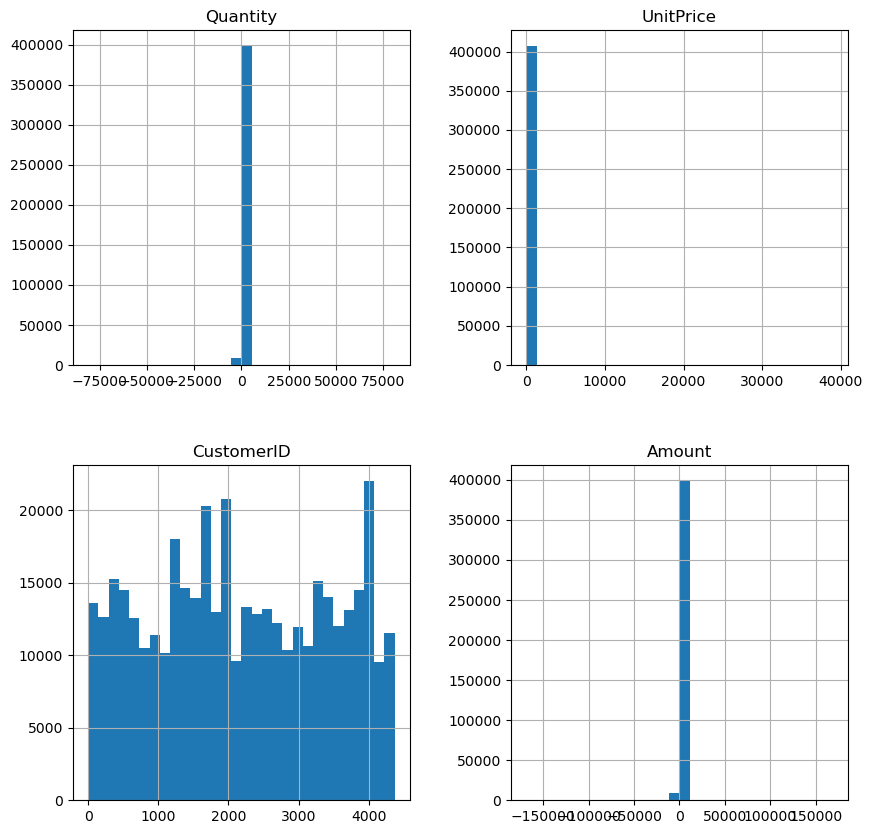

In [157]:
data.hist(bins=30, figsize=(10,10))
matplotlib.show()

In [15]:
data.skew()

C:\Users\User\AppData\Local\Temp\ipykernel_860\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Quantity       -0.264076
UnitPrice     186.506972
CustomerID      0.029835
dtype: float64

In [16]:
data.shape

(541909, 8)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [18]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Data cleaning

In [19]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [20]:
data.dropna(inplace = True)

In [21]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [22]:
data.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [23]:
X = data[['Quantity', 'UnitPrice']]
y = data['Description']

In [26]:
import seaborn as seaborn
import datetime as datetime

### data preparation

In [158]:
r = data.groupby('CustomerID')['Quantity'].sum()
r = r.reset_index()
r.head(10)

,CustomerID,Quantity
0,0,0
1,1,2458
2,2,2341
3,3,631
4,4,197
5,5,470
6,6,20
7,7,530
8,8,240
9,9,1591


In [170]:
r1 = data.groupby('CustomerID')['InvoiceNo'].count()
r1 = r1.reset_index()
r1.head(10)

,CustomerID,InvoiceNo
0,0,2
1,1,182
2,2,31
3,3,73
4,4,17
5,5,95
6,6,4
7,7,58
8,8,13
9,9,59


In [172]:
p = pd.merge(r, r1, on = 'CustomerID', how = 'inner')
p.head(10)

,CustomerID,Quantity,InvoiceNo
0,0,0,2
1,1,2458,182
2,2,2341,31
3,3,631,73
4,4,197,17
5,5,470,95
6,6,20,4
7,7,530,58
8,8,240,13
9,9,1591,59


In [173]:
p.head()

,CustomerID,Quantity,InvoiceNo
0,0,0,2
1,1,2458,182
2,2,2341,31
3,3,631,73
4,4,197,17


In [161]:
data.describe()

,Quantity,UnitPrice,CustomerID,Amount
count,4.068290e+05,406829.000000,406829.000000,406829.000000
mean,7.133659e+03,3.460471,2176.377102,20.401854
std,1.451165e+05,69.315162,1255.543861,427.591718
min,0.000000e+00,0.000000,0.000000,-168469.600000
25%,1.448160e+03,1.250000,1196.000000,4.200000
50%,3.575000e+03,1.950000,2073.000000,11.100000
75%,7.502950e+03,3.750000,3287.000000,19.500000
max,7.899219e+07,38970.000000,4371.000000,168469.600000


### plot generation

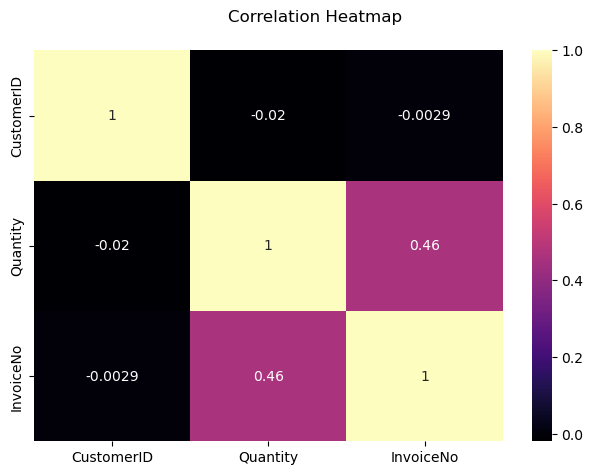

In [176]:
seaborn.heatmap(p.corr(), cmap = 'magma' ,annot = True)
matplotlib.suptitle("Correlation Heatmap")
matplotlib.tight_layout()

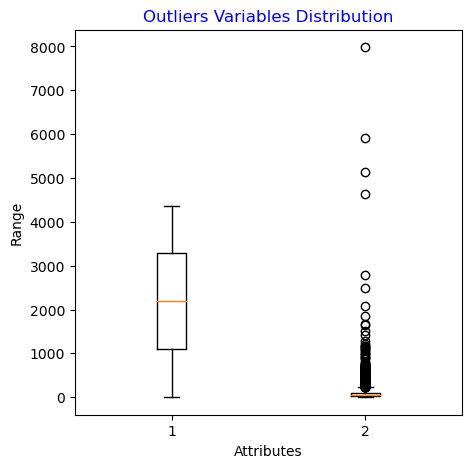

In [177]:
attri = ['CustomerID', 'InvoiceNo']
matplotlib.figure(figsize = (5, 5))
matplotlib.boxplot(p[attri])
matplotlib.title("Outliers Variables Distribution", fontsize = 12, color = 'blue' )
matplotlib.xlabel("Attributes")
matplotlib.ylabel("Range")
matplotlib.show()

In [179]:
r_df = p[['CustomerID', 'InvoiceNo']]
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(r_df)
rfm_df_scaled
k_means = KMeans(n_clusters = 5)
k_means.fit(r_df)

KMeans(n_clusters=5)

In [180]:
wc_ss = []
ran_ge_n_cluster = [2, 3, 4, 5, 6, 7, 8]
for n in ran_ge_n_cluster:
    k_means = KMeans(n_clusters = n)
    k_means.fit(r_df)
    wc_ss.append(k_means.inertia_)
    
wc_ss

[1977178454.4344885,
 1010096896.0291657,
 671228624.1596794,
 514904750.1350473,
 386971901.50196713,
 301237778.66542053,
 249690081.91535264]

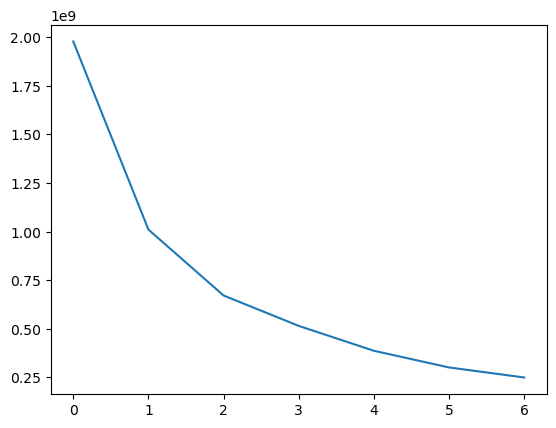

In [181]:
matplotlib.plot(wc_ss);

In [182]:
p['CustomerID'] = k_means.labels_
p.head(3)

,CustomerID,Quantity,InvoiceNo
0,6,0,2
1,6,2458,182
2,6,2341,31


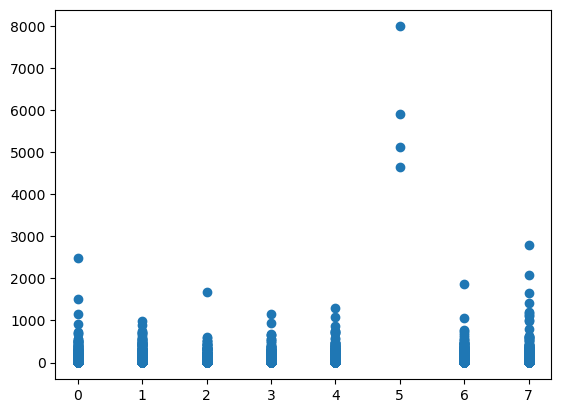

In [183]:
matplotlib.scatter(p['CustomerID'], p['InvoiceNo']);

<AxesSubplot:xlabel='InvoiceNo', ylabel='CustomerID'>

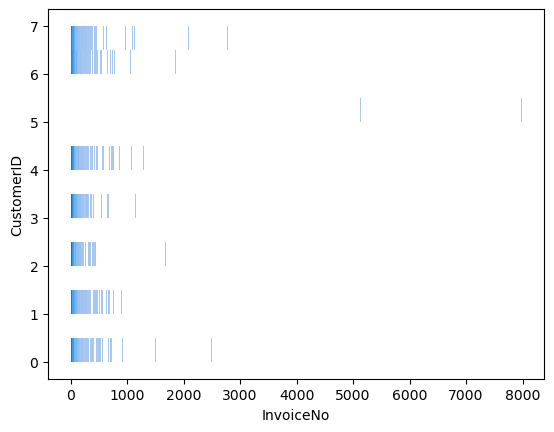

In [186]:
seaborn.histplot(x = 'InvoiceNo', y = 'CustomerID', data = p)

### performing EDA

In [187]:
data['CustomerID'] = pd.to_numeric(data['CustomerID'], errors='coerce')

In [188]:
data.dropna(subset=['CustomerID'], inplace=True)

In [189]:
from sklearn.preprocessing import LabelEncoder

In [190]:
label_encoder = LabelEncoder()

In [191]:
data['CustomerID'] = label_encoder.fit_transform(data['CustomerID'])

In [192]:
dat = data.iloc[0:2000]

In [193]:
X = dat[['Quantity', 'CustomerID']]
y = dat['InvoiceNo']

### Split the data into training and testing sets

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Classifier

In [195]:
rf_classifier = RandomForestClassifier()

In [196]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [197]:
y_pred_rf = rf_classifier.predict(X_test)

In [198]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

      536365       0.00      0.00      0.00         0
      536367       0.00      0.00      0.00         0
      536368       1.00      1.00      1.00         1
      536370       1.00      0.80      0.89         5
      536373       0.00      0.00      0.00         4
      536374       0.00      0.00      0.00         1
      536375       0.00      0.00      0.00         6
      536377       0.00      0.00      0.00         0
      536378       1.00      1.00      1.00         2
      536381       0.89      1.00      0.94         8
      536382       0.00      0.00      0.00         0
      536384       1.00      1.00      1.00         2
      536385       0.00      0.00      0.00         2
      536386       0.00      0.00      0.00         1
      536388       0.75      0.75      0.75         4
      536389       1.00      0.50      0.67         2
      536390       0.50      0.17      0.25         6
      536392       1.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

### confusion matrix

In [199]:
print(confusion_matrix(y_test, y_pred_rf))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 3]]


### Linear regression

In [200]:
data_numeric = data[pd.to_numeric(data['CustomerID'], errors='coerce').notnull()]

In [201]:
data_non_numeric = data[pd.to_numeric(data['CustomerID'], errors='coerce').isnull()]

In [202]:
linear_reg = LinearRegression()

In [203]:
y_train_cat = y_train.apply(lambda col:pd.Categorical(col).codes)
linear_reg.fit(X_train, y_train_cat)

C:\Users\User\AppData\Local\Temp\ipykernel_860\510757142.py:1: FutureWarning: Allowing scalars in the Categorical constructor is deprecated and will raise in a future version.  Use `[value]` instead
  y_train_cat = y_train.apply(lambda col:pd.Categorical(col).codes)
C:\Users\User\AppData\Local\Temp\ipykernel_860\510757142.py:1: FutureWarning: Allowing scalars in the Categorical constructor is deprecated and will raise in a future version.  Use `[value]` instead
  y_train_cat = y_train.apply(lambda col:pd.Categorical(col).codes)
C:\Users\User\AppData\Local\Temp\ipykernel_860\510757142.py:1: FutureWarning: Allowing scalars in the Categorical constructor is deprecated and will raise in a future version.  Use `[value]` instead
  y_train_cat = y_train.apply(lambda col:pd.Categorical(col).codes)
C:\Users\User\AppData\Local\Temp\ipykernel_860\510757142.py:1: FutureWarning: Allowing scalars in the Categorical constructor is deprecated and will raise in a future version.  Use `[value]` instead


LinearRegression()

In [204]:
reg_pred = linear_reg.predict(np.array(X_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [205]:
#a = np.array(y_test.apply(lambda col:pd.Categorical(col).codes))
#b = np.array(reg_pred).reshape(-1,1)
linear_reg.score(X_test, reg_pred)

1.0

### Decision tree classifier

In [214]:
y_pred_rf = rf_classifier.predict(X_test)

In [215]:
tree_classifier = DecisionTreeClassifier()

In [220]:
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [221]:
y_pred_tree = tree_classifier.predict(X_test)

In [222]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)

In [223]:
print("Decision Tree Classifier Accuracy:", accuracy_tree)

Decision Tree Classifier Accuracy: 0.905


## Logistic regression

In [224]:
logistic_reg = LogisticRegression()

In [225]:
logistic_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [226]:
y_pred_logistic = logistic_reg.predict(X_test)

In [227]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

In [145]:
print("Logistic Regression Accuracy:", accuracy_logistic)

Logistic Regression Accuracy: 0.0875
